# NFDRSV4 Command Line Interface (CLI)

Written by: Stu Brittan (Altura Solutions) and W. Matt Jolly (USFS,RMRS, Missoula Fire Sciences Laboratory)<br>
Contact: W. Matt Jolly, william.jolly@usda.gov<br>
Version: 1.0 - Example workbook to show command line process and visualize outputs<br>


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Source: https://colorbrewer2.org/#type=diverging&scheme=Spectral&n=5
col1 = '#d7191c'
col2 = '#fdae61'
col3 = '#ffffbf'
col4 = '#abdda4'
col5 = '#2b83ba'

<h3>RunNFDRS takes 1 parameter: A path to a RunNFDRS configuration file.</h3>
Usage: <em>RunNFDRS configFileName</em><br>
     where configFileName is the complete path to a RunNFDRS configuration file<br>
     
The config file points to two other files: the fire weather file (FW21 in CSV format) and the initialization file which sets up the NFDRS model<br>

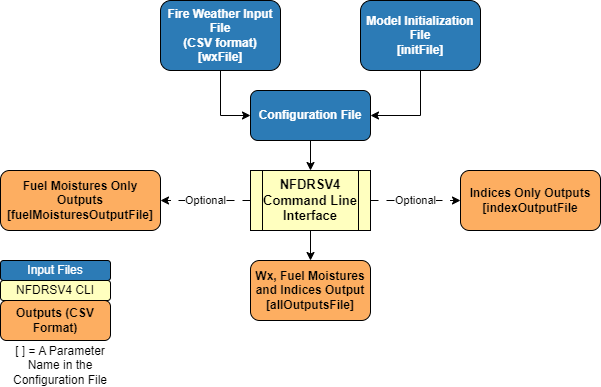

This is example comes from a weather file created from the ECMWF ERA5-Land Reanalysis, extracted for the town of Oristano. <a href="https://www.theguardian.com/world/2021/jul/26/firefighters-battle-wildfires-raging-across-south-west-sardinia">Click here for the Guardian article about the fire here in 2021</a><br>The fire started on 24 July 2021.

In [3]:
!RunNFDRS.exe Oristano.cfg

Total milliseconds time for NFDRS: 31603


In [4]:
siteName = "Oristano"
dat = pd.read_csv('Oristano_output.csv')
dat.rename(columns=lambda x: x.strip(), inplace=True)
dat['DateTime']=pd.to_datetime(dat['DateTime'].astype(str))
dat.set_index(dat.DateTime,inplace=True)

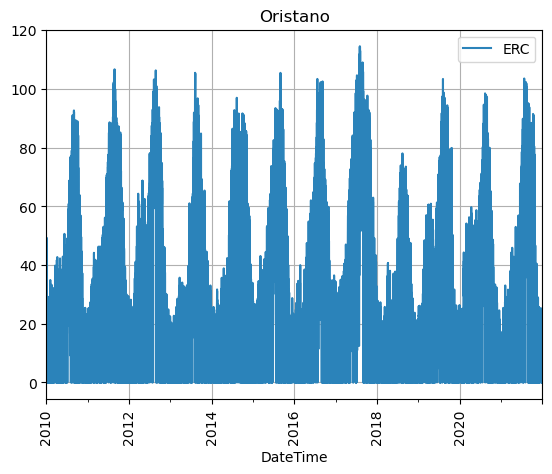

In [25]:
f,ax = plt.subplots()
dat.ERC.plot(ax=ax,title=siteName,color=col5,legend=True,label="ERC")
plt.grid()
_ = plt.xticks(rotation=90)    

In [10]:
PLowLim = "2021-01-01"
PUpperLim = "2021-12-31"
dat_2021 = dat[(dat['DateTime'] > PLowLim) & (dat['DateTime'] <= PUpperLim)]
PLowLim = "2021-07-24"
PUpperLim = "2021-07-28"
dat_2021_event = dat[(dat['DateTime'] > PLowLim) & (dat['DateTime'] <= PUpperLim)]

Text(0, 0.5, 'Energy Release Component')

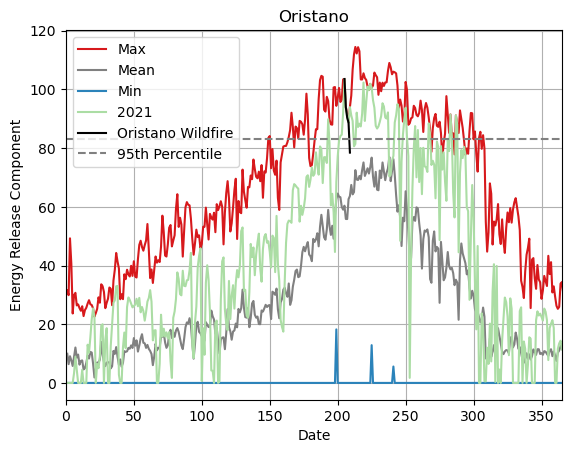

In [26]:
Variable = "ERC"
VariableLabel = "Energy Release Component"
# Plot the historical daily min, mean and max Energy Release Component
p95 = dat[Variable].quantile(0.95)
f,ax = plt.subplots()
dat[Variable].groupby(dat.DateTime.dt.dayofyear).max().plot(ax=ax,title=siteName,color=col1,legend=True,label="Max")
dat[Variable].groupby(dat.DateTime.dt.dayofyear).mean().plot(ax=ax,title=siteName,color='grey',legend=True,label='Mean')
dat[Variable].groupby(dat.DateTime.dt.dayofyear).min().plot(ax=ax,title=siteName,color=col5,legend=True,label="Min")
dat_2021[Variable].groupby(dat_2021.DateTime.dt.dayofyear).max().plot(ax=ax,title=siteName,color=col4,legend=True,label="2021")

dat_2021_event[Variable].groupby(dat_2021.DateTime.dt.dayofyear).max().plot(ax=ax,title=siteName,color="black",legend=True,label="Oristano Wildfire")
plt.axhline(y=p95, color='grey', linestyle='--',label="95th Percentile")
plt.legend()
plt.grid()
ax.set_xlim(0,365)
ax.set_xlabel("Date")
ax.set_ylabel(VariableLabel)